# Jupyter magic commands

Commands are provided by the *pythonhere* extension

In [1]:
%load_ext pythonhere

## %connect-there
**Connect to remote interpreter via SSH**

Command takes single optional argument: location of connection config.<br>
If argument is not provided, values are loaded from the **there.env** file.

Config values could be overridden by environment variables with same names.

In [2]:
import os
os.environ["THERE_PORT"] = "8022"

In [3]:
%connect-there there.env

### there.env example
```
# PythonHere device IP address
THERE_HOST=127.0.0.1

# Port, as set in PythonHere app Settings section
THERE_PORT=8023

# Username, as set in PythonHere app Settings section
THERE_USERNAME=admin

# Password, as set in PythonHere app Settings section
THERE_PASSWORD=xxx
```

## %there group of commands

In [4]:
%there --help

Usage: there [OPTIONS] COMMAND [ARGS]...

  Group of commands to run on remote side.

Options:
  -b, --background           Run in background
  -l, --limit INTEGER RANGE  Number of lines to show when in background mode
  -d, --delay FLOAT          The time to wait in seconds before executing a
                             command

  --help                     Show this message and exit.

Commands:
  kv          Insert given rules into the Kivy Language Builder.
  log         Listen for log records, send logging output to stdout.
  pin         Create pinned shortcut to run a Python script.
  screenshot  Display the actual image of the Kivy window.
  shell       Execute shell command on remote side.
  upload      Upload files and directories to `remotepath`.


Default action for *%there*, if command is not specified - execute python code.

### there
**Execute python code on the remote side.**<br>

In [5]:
%%there 
import this

### kv

In [6]:
%there kv --help

Usage: there kv [OPTIONS]

  Insert given rules into the Kivy Language Builder.

Options:
  -c, --clear-style  Unload previously applied rules
  --help             Show this message and exit.


If option `--clear-style` is provided,<br> all previous rules, that was loaded with *%%there kv* command,
are unloaded before command execution.

If root widget is defined, it will replace App's current root.



In [7]:
%%there kv
Image:
    source: "../app/data/logo/logo-128.png"
    canvas.before:
        PushMatrix
        Rotate:
            angle: 45
            origin: self.center
    canvas.after:
        PopMatrix

### shell

In [8]:
%there shell --help

Usage: there shell [OPTIONS]

  Execute shell command on remote side.

Options:
  --help  Show this message and exit.


In [9]:
%%there shell
pwd

/data/data/me.herethere.pythonhere_dev/files/upload


In [10]:
%%there shell
for i in 1 2 3
do
    echo -n "$i"
done

123

Listen to Android system logs in the background and show last two lines of output:

In [11]:
%%there -bl 2 shell
logcat

LimitedOutput()

### upload

In [12]:
%there upload --help

Usage: there upload [OPTIONS] LOCALPATHS... REMOTEPATH

  Upload files and directories to `remotepath`.

Options:
  --help  Show this message and exit.


*upload* root directory is application current working directory.

In [13]:
!touch some.ico script.py
!mkdir -p dir1/dir2

In [14]:
%there upload some.ico script.py dir1 ../

In [15]:
%%there shell
find

.
./some.ico
./script.py
./dir1
./dir1/dir2


### pin

In [16]:
%there pin --help

Usage: there pin [OPTIONS] SCRIPT

  Create pinned shortcut to run a Python script.

Options:
  -l, --label TEXT  Label for shortcut
  --help            Show this message and exit.


In [17]:
%there pin script.py --label "My script"

### log

In [18]:
%there log --help

Usage: there log [OPTIONS]

  Listen for log records, send logging output to stdout. This command blocks
  execution thread forever.

Options:
  --help  Show this message and exit.


```{note}
Since the command blocks and never ends, it is useful to run with --backgroud (-b) option
```

In [19]:
%there -b -l 1 log

LimitedOutput()

In [20]:
# wait, to make sure *log* cell connection is established before next cell is executed
import asyncio ; await asyncio.sleep(3) 

In [21]:
%%there
from kivy.logger import Logger
Logger.info(f"Hello from the main cell")

### screeenshot

In [22]:
%there screenshot --help

Usage: there screenshot [OPTIONS]

  Display the actual image of the Kivy window.

Options:
  -w, --width INTEGER    Width in pixels to which to constrain a displayed
                         image

  -o, --output FILENAME  Path to a local file to save screenshot as PNG image
  --help                 Show this message and exit.


* Wait for half of a second before a command execution,<br>
* make a screenshot,
* display a result constrained to 200px width,
* and save image to a local file:

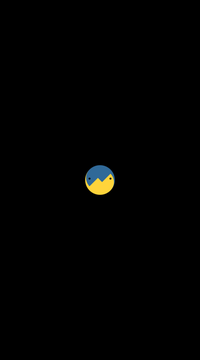

In [23]:
%there -d 0.5 screenshot -w 200 -o /tmp/screenshot_test.png